## DBSCAN Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

**DBSCAN Algorithm**
<pre>
For each object p in D
    if p is a core object and not processed then 
        C = retrieve all objects density-reachable from p 
        mark all objects in C as processed
        report C as a cluster
    else mark p as outlier
    end if
End For
</pre>

In [2]:
class DBSCAN(object):
    UN_CLASSIFIED = 0
    NOISE = -1

    UN_VISITED = 0
    VISITED = 1

    def __init__(self, eps, min_pts):
        self.eps = eps
        self.minPts = min_pts
        self.n_cluster = 1

    def fit(self, X):
        self._train(X)

    def _train(self, X):
        n = X.shape[0]
        self.labels_ = np.array([DBSCAN.UN_CLASSIFIED] * n)
        visited = DBSCAN.UN_VISITED * np.ones(n)

        left_classified, = np.where(visited == DBSCAN.UN_VISITED)
        while len(left_classified) != 0:
            x_idx = left_classified[0]

            visited[x_idx] = DBSCAN.VISITED # mark visited
            start_point = X[x_idx, :]
            n_neighbors, pts = self.get_neighbors(X, start_point)

            if n_neighbors < self.minPts:
                self.labels_[x_idx] = DBSCAN.NOISE
            else:
                self.labels_[x_idx] = self.n_cluster
                while len(pts) != 0:
                    neighor_id = pts[0]
                    pts = np.delete(pts, np.where(pts == neighor_id))
                    if visited[neighor_id] == DBSCAN.UN_VISITED:
                        visited[neighor_id] = DBSCAN.VISITED # mark visited
                        n_new_neighors, new_pts = self.get_neighbors(X, X[neighor_id])

                        if n_new_neighors >= self.minPts:
                            pts = np.concatenate((pts, new_pts), axis=None)

                    if self.labels_[neighor_id] == DBSCAN.UN_CLASSIFIED:
                        self.labels_[neighor_id] = self.n_cluster

                self.n_cluster += 1

            left_classified, = np.where(visited == DBSCAN.UN_VISITED)

    def get_neighbors(self, X, pt):
        dist = np.linalg.norm(X - pt, 2, axis=1)
        neighors = np.argsort(dist)
        count, = np.where(dist <= self.eps)
        return len(count), neighors[:len(count)]
    
    @staticmethod
    def k_nearest_neighbour(X, pt, k):
        dist = np.linalg.norm(X - pt, 2, axis=1)
        neighors = np.argsort(dist)
        k_dist = dist[neighors[k]]
        return k_dist

    @classmethod
    def plot_param_est_curve(cls, data, k_nn):
        y = sorted([DBSCAN.k_nearest_neighbour(data, pt, k_nn) for pt in data])
        # plot
        plt.plot([id_ for id_ in range(len(data))], y, marker='o')
        plt.xlabel('Points sorted according to k={} nearest neighour'.format(k_nn))
        plt.ylabel('k={} Nearest Distance'.format(k_nn))
            

In [3]:
data = pd.read_csv('cluster.csv')
data


,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING and ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY
0,ANDHRA PRADESH,2001,2602,1555,136,871,1182,765,417,214
1,ARUNACHAL PRADESH,2001,83,53,3,33,83,55,28,22
2,ASSAM,2001,1356,481,40,817,1480,1070,410,532
3,BIHAR,2001,3643,3419,250,888,2159,518,1641,1291
4,CHHATTISGARH,2001,880,529,45,959,207,171,36,87
...,...,...,...,...,...,...,...,...,...,...
415,D & N HAVELI,2012,7,2,0,3,13,9,4,2
416,DAMAN & DIU,2012,3,5,0,5,3,0,3,1
417,DELHI UT,2012,521,439,82,706,3970,2160,1810,28
418,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0


In [4]:
all_headers = data.columns
all_headers

Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
       'KIDNAPPING and ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY'],
      dtype='object')

In [5]:
cols_to_norm = all_headers[2:]
print (cols_to_norm)

Index(['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
       'KIDNAPPING and ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY'],
      dtype='object')


In [6]:
data[cols_to_norm] = StandardScaler().fit_transform(data[cols_to_norm])
data

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING and ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY
0,ANDHRA PRADESH,2001,1.355806,0.624391,0.117431,0.434526,0.273298,0.141587,0.572318,0.326104
1,ARUNACHAL PRADESH,2001,-0.722163,-0.683682,-0.407091,-0.772706,-0.630457,-0.594066,-0.565354,-0.536914
2,ASSAM,2001,0.327958,-0.310942,-0.261172,0.356733,0.518356,0.457607,0.551846,1.755478
3,BIHAR,2001,2.214546,2.247726,0.567021,0.459016,1.076727,-0.114337,4.152037,5.167098
4,CHHATTISGARH,2001,-0.064703,-0.269140,-0.241453,0.561300,-0.528486,-0.473875,-0.541958,-0.244747
...,...,...,...,...,...,...,...,...,...,...
415,D & N HAVELI,2012,-0.784856,-0.728097,-0.418923,-0.815924,-0.688021,-0.641728,-0.635545,-0.626812
416,DAMAN & DIU,2012,-0.788156,-0.725485,-0.418923,-0.813043,-0.696244,-0.651053,-0.638470,-0.631307
417,DELHI UT,2012,-0.360849,-0.347519,-0.095533,0.196825,2.565990,1.586991,4.646296,-0.509945
418,LAKSHADWEEP,2012,-0.790631,-0.729839,-0.418923,-0.820246,-0.698711,-0.651053,-0.647243,-0.635802


In [7]:
import nbimporter # library used for importing ipnb notebooks
from pca import PCA ## import pca.ipynb as module

Importing Jupyter notebook from pca.ipynb


In [8]:
n_features = len(cols_to_norm)
n_features

8

Using PCA to determine the principal components of the features

### Principal Component Analysis or PCA is a widely used technique for dimensionality reduction of the large data set. Reducing the number of components or features costs some accuracy and on the other hand, it makes the large data set simpler, easy to explore and visualize. Also, it reduces the computational complexity of the model which makes machine learning algorithms run faster.

([<matplotlib.axis.XTick at 0x22632251708>,
 <a list of 8 Text xticklabel objects>)

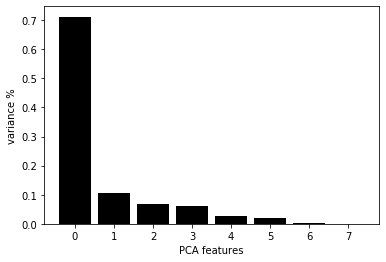

In [9]:


pca = PCA(n_components=n_features)
principal_components = pca.fit_transform(data[cols_to_norm].to_numpy())
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [10]:
PCA_components = pd.DataFrame(principal_components)
PCA_components = pd.concat([data[all_headers[:2]], PCA_components.loc[:, [0,1]]], axis=1)
PCA_components

,STATE/UT,YEAR,0,1
0,ANDHRA PRADESH,2001,1.406527,0.431666
1,ARUNACHAL PRADESH,2001,-1.739188,-0.110502
2,ASSAM,2001,1.101915,1.202441
3,BIHAR,2001,5.404339,4.747684
4,CHHATTISGARH,2001,-0.667851,0.123848
...,...,...,...,...
415,D & N HAVELI,2012,-1.888731,-0.164438
416,DAMAN & DIU,2012,-1.896977,-0.162338
417,DELHI UT,2012,2.797011,-0.651643
418,LAKSHADWEEP,2012,-1.907241,-0.167865


<module 'matplotlib.pyplot' from 'C:\\pyz\\lib\\site-packages\\matplotlib\\pyplot.py'>

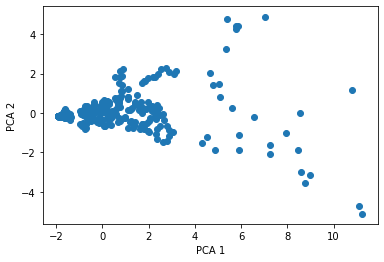

In [11]:
plt.scatter(PCA_components[0], PCA_components[1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt

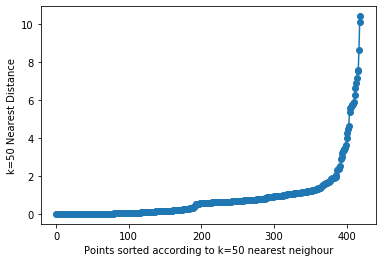

In [12]:
DBSCAN.plot_param_est_curve(PCA_components.loc[:, [0,1]].to_numpy(), 50)

In [13]:
clusterer = DBSCAN(eps=2, min_pts=50)
clusterer.fit(PCA_components.loc[:, [0,1]].to_numpy())

Text(0, 0.5, 'PCA 2')

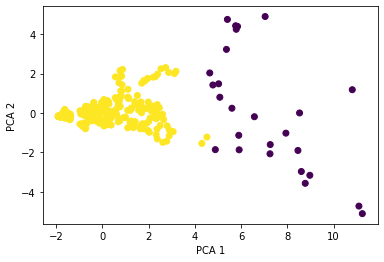

In [14]:
plt.scatter(PCA_components[0], PCA_components[1], c=clusterer.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [15]:
df_dbscan_labels = pd.concat([data[all_headers[:2]], pd.Series(clusterer.labels_)], axis=1)
df_dbscan_labels.columns = ['State', 'Year', 'Label']
df_dbscan_labels['Label'].unique()

array([ 1, -1], dtype=int64)

In [16]:
y1=df_dbscan_labels[(df_dbscan_labels['Label']==1) & (df_dbscan_labels['Year']==2010)]
y2=df_dbscan_labels[(df_dbscan_labels['Label']==-1) & (df_dbscan_labels['Year']==2010)]
o1=[i for i in y1['State']]
print((o1))
o2=[i for i in y2['State']]
print((o2))

['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TRIPURA', 'UTTARAKHAND', 'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI', 'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY']
['BIHAR', 'UTTAR PRADESH']


In [17]:

df = pd.read_csv('cluster.csv')
concat_df = pd.concat([df, df_dbscan_labels['Label']], axis=1)
outliers = concat_df[concat_df['Label'] == -1]
outliers

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING and ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,Label
3,BIHAR,2001,3643,3419,250,888,2159,518,1641,1291,-1
25,UTTAR PRADESH,2001,7601,7964,1186,1958,4330,2879,1451,905,-1
38,BIHAR,2002,3712,3526,396,1040,2361,744,1617,1289,-1
60,UTTAR PRADESH,2002,6825,6283,1243,1415,3430,2298,1132,552,-1
73,BIHAR,2003,3771,3540,298,985,2427,674,1753,1221,-1
95,UTTAR PRADESH,2003,5284,3793,1525,911,2208,1499,709,317,-1
108,BIHAR,2004,3948,2995,280,1390,3413,997,2416,1319,-1
130,UTTAR PRADESH,2004,6126,5580,1436,1397,3337,2324,1013,378,-1
143,BIHAR,2005,3471,3307,259,1147,2693,929,1764,1212,-1
165,UTTAR PRADESH,2005,5711,5637,1520,1217,2955,2256,699,286,-1


In [18]:
2+4

6